# Machine Learning-based Occupancy Estimation Using Multivariate Sensor Nodes

This notebook aims to accurately estimate the number of occupants in a room by leveraging multiple heterogeneous sensor nodes and machine learning models.

## Exploratory Data Analytics (EDA)

In this section we will explore the data, its features, their distribution and identify any problems in the data that need to be addressed before modelling.

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Occupancy_Estimation.csv')
df.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


Based on the above values, and the information from the 'Machine Learning-based Occupancy Estimation Using Multivariate Sensor Nodes' research paper, below is a summary of what each feature in the dataset represents:

- **Date and Time:** The date and time when the measurements were taken.
- **S1_Temp to S4_Temp:** Temperature readings from four different sensor nodes.
- **S1_Light to S4_Light:** Light intensity readings from the same four sensor nodes.
- **S1_Sound to S4_Sound:** Sound level measurements from these nodes.
- **S5_CO2:** Carbon dioxide concentration in the room.
- **S5_CO2_Slope:** The rate of change of CO2 concentration over time, indicating occupancy changes.
- **S6_PIR and S7_PIR:** Readings from two Passive Infrared (PIR) sensors, detecting motion.
- **Room_Occupancy_Count:** The actual count of people in the room, used as ground truth for occupancy estimation.



In [ ]:
df.shape

(10129, 19)

There are 10129 instances and 18 features. The target variable is “Room_Occupancy_Count”.

In [ ]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

The dataset has no nulls.

In [ ]:
df.duplicated().sum()

0

The dataset has no duplicate rows.

In [ ]:
df['Room_Occupancy_Count'].value_counts()

0    8228
2     748
3     694
1     459
Name: Room_Occupancy_Count, dtype: int64

The target feature is not balanced, thus we have to handle the class imbalance issue before modelling.

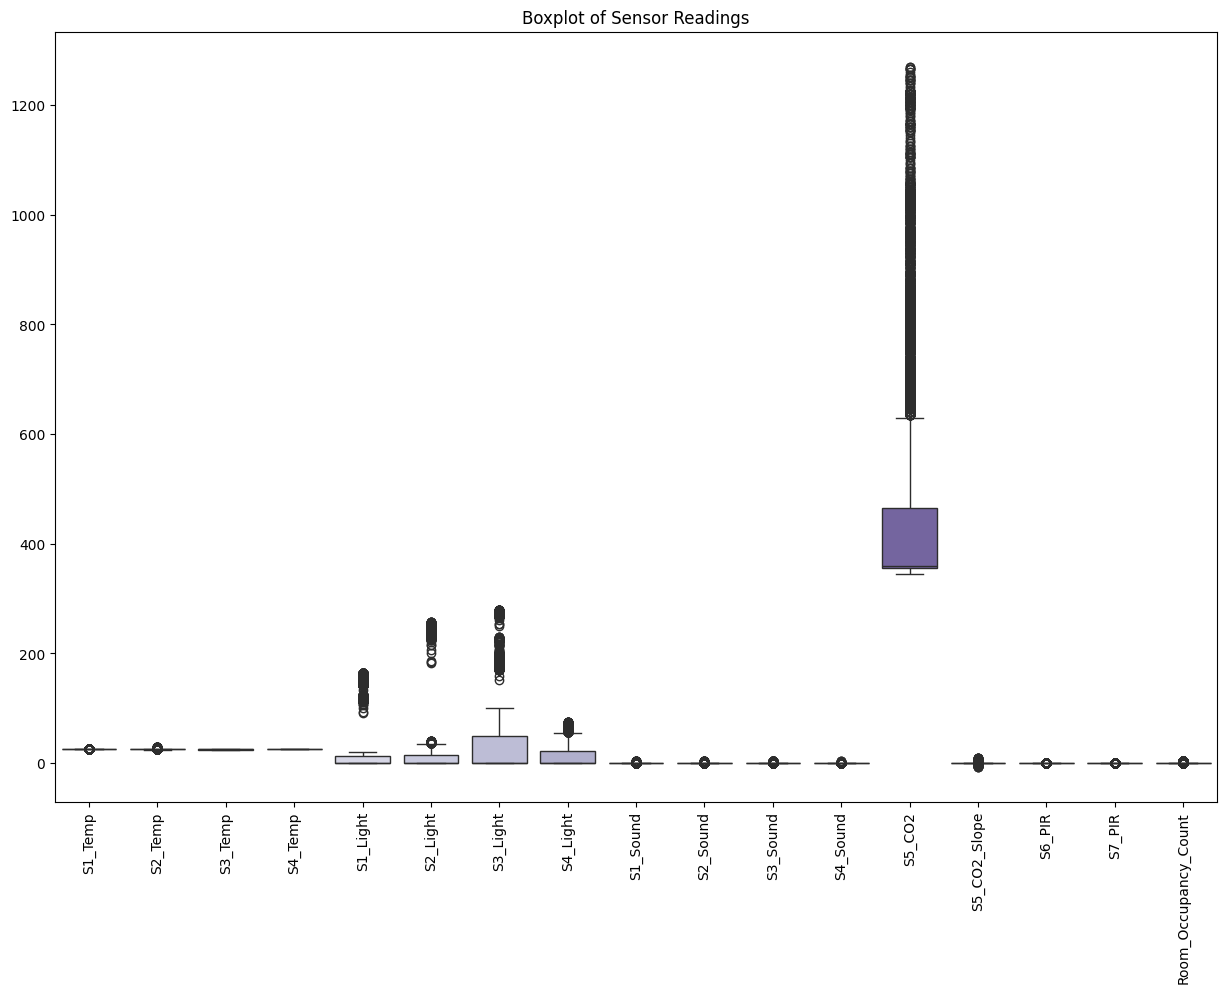

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting columns for the boxplot (excluding 'Date' and 'Time')
columns_for_boxplot = df.select_dtypes(include='number').columns

# Setting the color palette to shades of purple
palette = sns.color_palette("Purples", len(columns_for_boxplot))

# Creating the boxplots
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[columns_for_boxplot], palette=palette)
plt.xticks(rotation=90)
plt.title('Boxplot of Sensor Readings')
plt.show()

Handling outliers in any data depends on the nature of the data and the goals of the analysis. Regarding our data:

- If outliers represent sensor errors or improbable readings, they should probably be removed or corrected. If they represent rare but legitimate events (like sudden changes in temperature or occupancy), they might be important to keep. Also, outliers in occupancy count could be due to unusual but legitimate events (like a meeting).

- So as a result, there are indeed some outliers appearing in the above box plot. However, and since the data is sensors' data, handling outliers might be tricky. Sensors will give high values when people are in the room, temperature is high, etc, ... So we can't say that all the high values that are not in the quantiles are outliers, they might be actually true and helpful for predicting the room occupancy counts.

Depending on the above justification, for now, the outliers will not be handeled as they might not be outliers in the first place! Their removal might affect the prediction of the occupancy counts negatively more than positively.

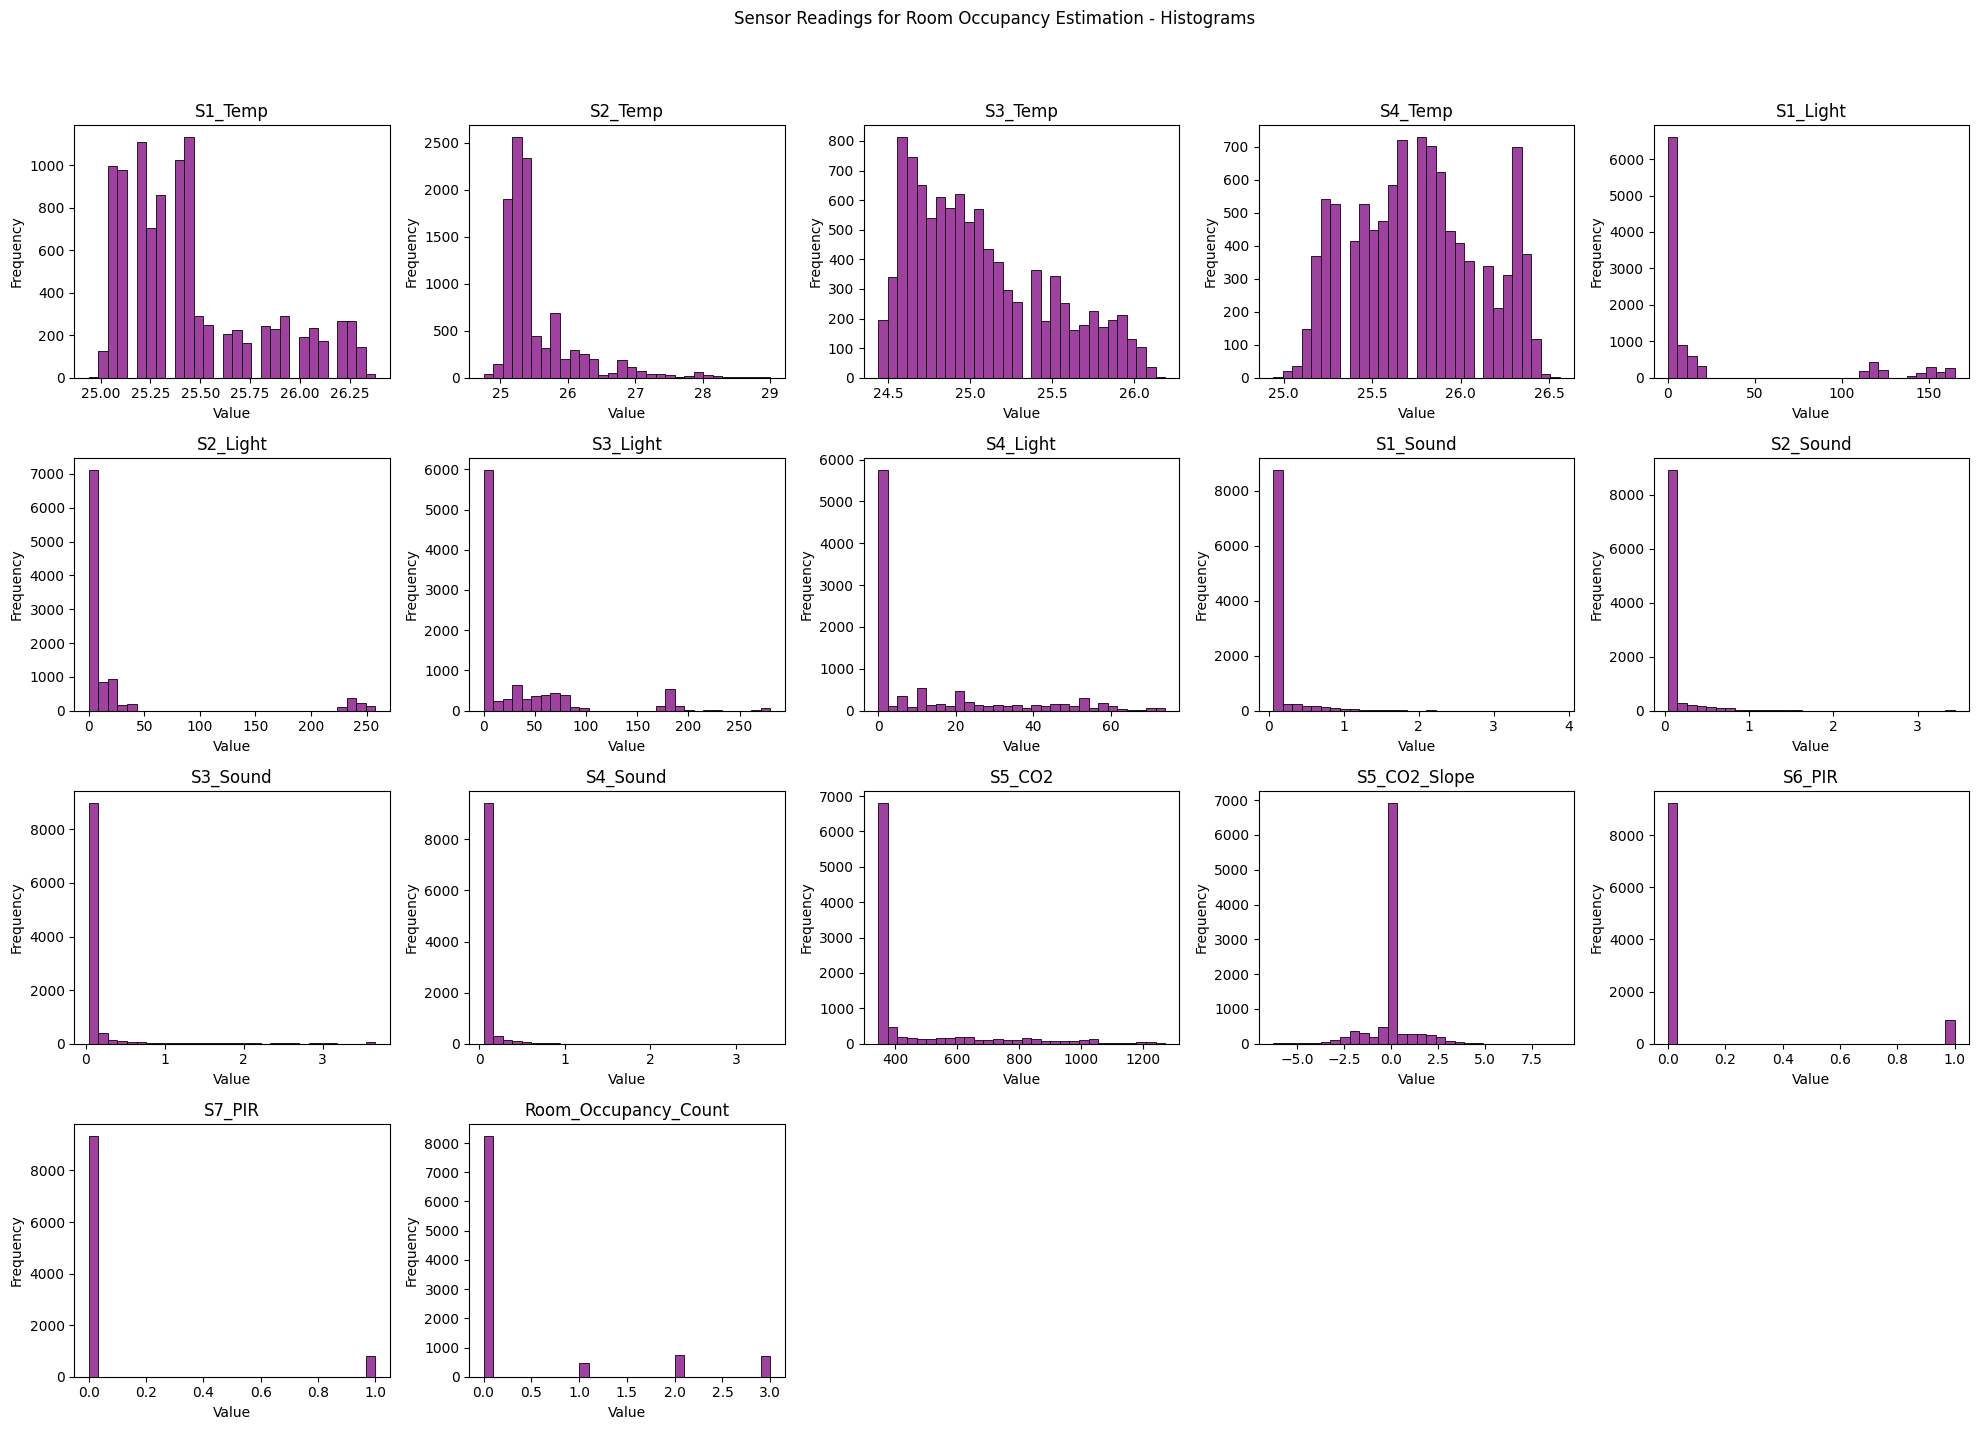

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
columns_to_plot = [
    'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
    'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
    'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
    'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
    'Room_Occupancy_Count'
]

# Number of rows and columns for subplots
n_rows = 4
n_cols = 5

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
fig.suptitle('Sensor Readings for Room Occupancy Estimation - Histograms')

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Plot each column as a histogram on a subplot
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], ax=axes[i], color="purple", bins=30)
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Remove any unused subplots
for j in range(i+1, n_rows*n_cols):
    fig.delaxes(axes[j])

# Show the plot
plt.show()

The above visualizations suggest a room that is generally quiet, often dimly lit or dark, with varying temperature and CO2 levels that may be influenced by the presence or absence of occupants. The motion sensors corroborate these observations, with frequent periods of no detected movement.

In [ ]:
# Combining the Date and Time columns into a single DateTime column
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Setting the new DateTime column as the index of the dataframe
df.set_index('DateTime', inplace=True)

# Dropping the original Date and Time columns as they are no longer needed
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Displaying the first few rows of the updated dataframe
df.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
DateTime,,,,,,,,,,,,,,,,,
2017-12-22 10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
2017-12-22 10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2017-12-22 10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
2017-12-22 10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
2017-12-22 10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In order to study the effect of the date and time on other features in the dataset, the date and time column were combined into one with a datetime format.

In [ ]:
# Finding the range of date and time in the dataset
date_time_range = df.index.min(), df.index.max()
date_time_range

(Timestamp('2017-12-22 10:49:41'), Timestamp('2018-01-11 09:00:09'))

In [ ]:
# Calculating the time differences between consecutive entries
time_diffs = df.index.to_series().diff().dropna()

# Displaying the first few time differences
time_diffs.head()

DateTime
2017-12-22 10:50:12   0 days 00:00:31
2017-12-22 10:50:42   0 days 00:00:30
2017-12-22 10:51:13   0 days 00:00:31
2017-12-22 10:51:44   0 days 00:00:31
2017-12-22 10:52:14   0 days 00:00:30
Name: DateTime, dtype: timedelta64[ns]

The above show us that:

- The dataset spans from December 22, 2017, at 10:49:41, to January 11, 2018, at 09:00:09. Providing a snapshot of sensor readings of some days in this period.

- The time differences between consecutive entries in the dataset are primarily 30 or 31 seconds. This suggests a near-regular sampling interval, with minor variations possibly due to the way the data was recorded or processed. These short, consistent intervals indicate that the dataset was likely recorded using an automated system set to capture data at approximately half-minute intervals.

<ipython-input-62-bc270819a24d>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  selected_day_data = df[selected_day]


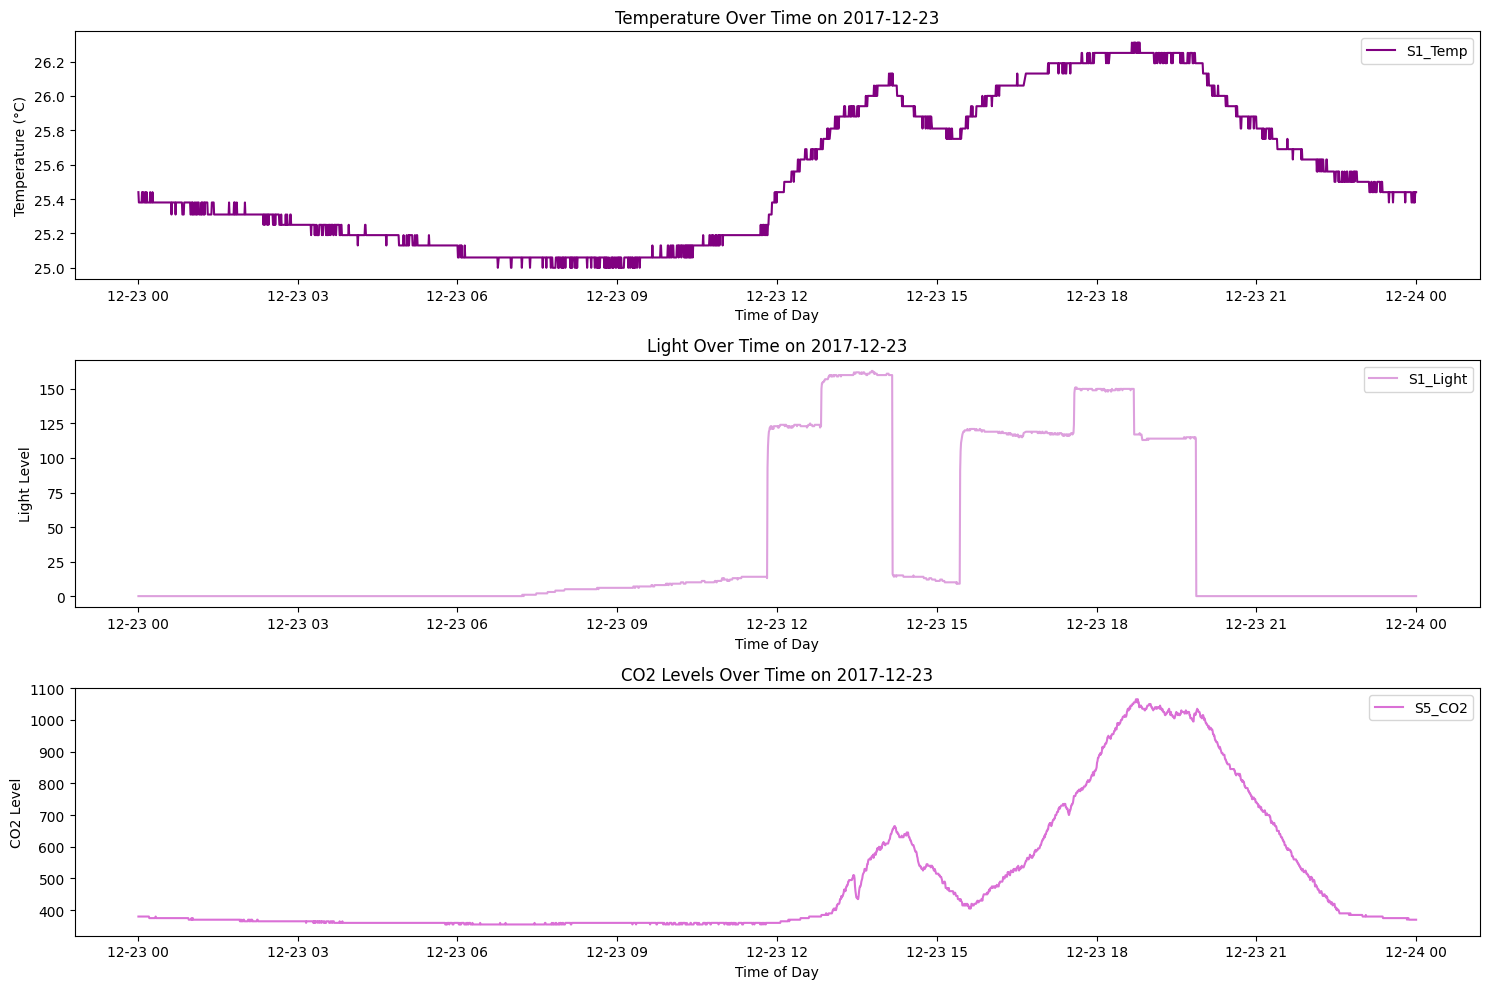

In [ ]:
# Choosing a representative day for analysis
# Here, we choose the first full day in the dataset for simplicity
selected_day = '2017-12-23'

# Filtering data for the selected day
selected_day_data = df[selected_day]

# Plotting sensor readings for the selected day
plt.figure(figsize=(15, 10))

# Temperature Sensor (S1_Temp)
plt.subplot(3, 1, 1)
plt.plot(selected_day_data['S1_Temp'], color='purple', label='S1_Temp')
plt.title('Temperature Over Time on ' + selected_day)
plt.xlabel('Time of Day')
plt.ylabel('Temperature (°C)')
plt.legend()

# Light Sensor (S1_Light)
plt.subplot(3, 1, 2)
plt.plot(selected_day_data['S1_Light'], color='plum', label='S1_Light')
plt.title('Light Over Time on ' + selected_day)
plt.xlabel('Time of Day')
plt.ylabel('Light Level')
plt.legend()

# CO2 Sensor (S5_CO2)
plt.subplot(3, 1, 3)
plt.plot(selected_day_data['S5_CO2'], color='orchid', label='S5_CO2')
plt.title('CO2 Levels Over Time on ' + selected_day)
plt.xlabel('Time of Day')
plt.ylabel('CO2 Level')
plt.legend()

plt.tight_layout()
plt.show()

To analyze how different times of the day affect sensor readings, we focused on plotting data across a single day to clearly observe the diurnal patterns. We also considered one sensor from each type for simplicity. The date that was chosen is December 23, 2017. The plots show that:

- **Temperature (S1_Temp):** The temperature plot shows variations throughout the day. There is a peak during the midday or afternoon, it suggests an increase in temperature due to external factors like sunlight. Evening and night times typically show a drop in temperature. However, the specific pattern depends on the location and environmental conditions. For example, if the sensor is indoors, heating and cooling systems might also affect these readings.

- **Light (S1_Light):** The light level plot reflects daily natural light cycles. Higher readings during daylight hours and lower readings during the night are shown. This pattern is typical for places with exposure to natural light. What might help us is the existence sudden increases or decreases in light levels, which could be due to artificial lighting being turned on or off, indicating room occupancy.

- **CO2 Levels (S5_CO2):** The CO2 level plot shows fluctuations that could correlate with room occupancy or ventilation. Higher CO2 levels might indicate more people in the room or poorer ventilation, especially if these levels rise during specific times of the day. In a typical indoor setting, CO2 levels might rise during times of high occupancy (like business hours in an office) and fall when the space is unoccupied. Which is very helpful for us in predicting the room occupancy.

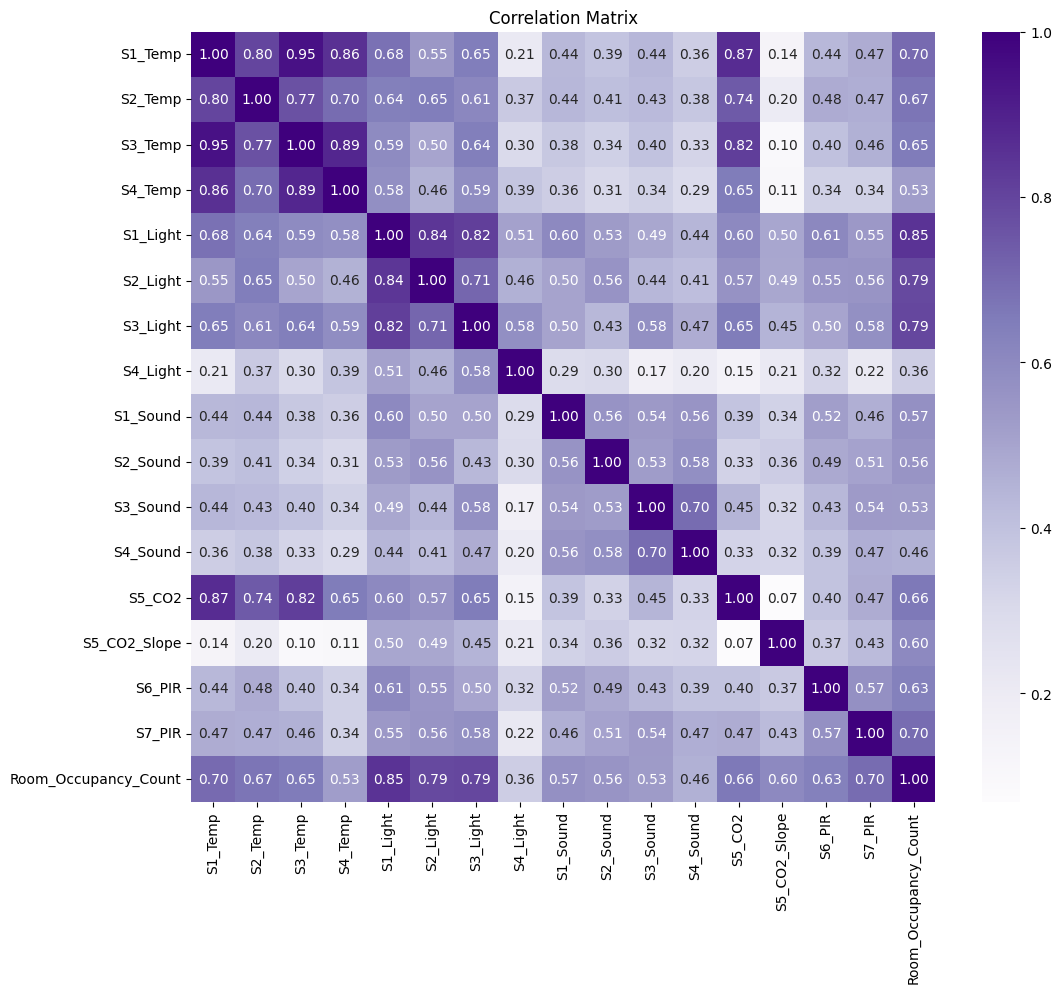

In [ ]:
# Computing the correlation matrix for the dataset
correlation_matrix = df.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Purples")
plt.title("Correlation Matrix")
plt.show()

Based on the correlation matrix, we can infer the below:

- **Temperature Sensors (S1_Temp to S4_Temp):** These sensors show a high correlation with each other, which is expected as they are likely measuring the temperature within the same environment.

- **Light Sensors (S1_Light to S4_Light):** Similarly, the light sensors also have a relatively high correlation with each other, although not as strong as the temperature sensors, which might be due to varying exposure to light sources.

- **Sound Sensors (S1_Sound to S4_Sound):** The sound sensors show moderate correlation with each other, suggesting that noise levels can vary at different points in the room.

- **CO2 Level (S5_CO2):** There is a strong correlation between CO2 levels and temperature, which may indicate that human occupancy (which both generates heat and increases CO2 levels) affects these readings.

- **CO2 Slope (S5_CO2_Slope):** The correlation of the CO2 slope with other variables is generally low, suggesting that the rate of change of CO2 doesn't have a strong linear relationship with the other sensor readings.

- **PIR Sensors (S6_PIR and S7_PIR):** These show a good correlation with each other, and also a moderate correlation with the Room_Occupancy_Count, which is expected as they are designed to detect motion which would be related to the presence of people.

- **Room_Occupancy_Count:** This variable has a strong positive correlation with the temperature and CO2 levels, and to a lesser extent with the light and sound sensors, indicating that these variables can be good predictors of occupancy.

- **Low Correlations with S4_Light:** S4_Light readings have relatively low correlations with other light sensors and variables, suggesting that the lighting conditions measured by this sensor are less influenced by the factors affecting the other sensors, or it could be positioned in a part of the room with different lighting conditions.

Overall, the correlation matrix suggests that temperature, CO2 levels, and PIR sensor readings are potentially good indicators of occupancy in the room. Sound and light readings are less correlated with occupancy but may still provide useful supplementary information.

## Basic Data Modeling

For comparison purposes, we will apply Random Forest, SVM, Gradient Boosting and XGBoost on data now before the any data preprocessing. We will use the models without dealing with:

1- MultiCollinearity

2- DateTime Column

3- Features' Scaling

4- Class Imbalance

5- Hyperparameters tuning (default parameters will be used)

6- Cross validation for model training

The goal of doing this is to compare the results to other results obtained after addressing the above for evaluation purposes.

***Notes:***

- Explanation regarding the models, performance metrics, appropraite data pre-processing and the issues above will all be provided in the next parts of this notebook, as this parts' goal is to be very basic and provide a baseline to compare it to the other parts' results.

- Theoritically, it's not a good practice to train models on imbalanced and unscaled data or to remove the datetime column that can be so useful, however, as mentioned before, it's only done for experimentation and evaluation purposes.

In [ ]:
from sklearn.model_selection import train_test_split
# Preparing the data
df = df.reset_index()
X = df.drop(['Room_Occupancy_Count', 'DateTime'], axis=1)  # Features
y = df['Room_Occupancy_Count']                 # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
import pandas as pd

# Creating a DataFrame with performance metrics for each model
p_b_d = {
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [None, None, None, None],
    'Precision': [None, None, None, None],
    'Recall': [None, None, None, None],
    'F1-Score': [None, None, None, None],
    'ROC-AUC Score': [None, None, None, None]
}

p_b = pd.DataFrame(p_b_d)

A dataframe was created to store the performance metrics for the models before any enhancments.

#### Random Forest

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Creating a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_classifier.predict(X_test)

In [ ]:
import numpy as np

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Calculating precision, recall, and f1-score for each class
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Calculating AUC-ROC score for multi-class

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_train))

# Calculating the ROC-AUC score
auc_roc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')
print(f'AUC-ROC Score: {auc_roc:.4f}')

Accuracy: 0.9970
Precision: 0.9917
Recall: 0.9892
F1-Score: 0.9903
AUC-ROC Score: 0.9939


In [ ]:
p_b['Accuracy'][0] = accuracy
p_b['Precision'][0] = precision
p_b['Recall'][0] = recall
p_b['F1-Score'][0] = f1
p_b['ROC-AUC Score'][0] = auc_roc

#### SVM

In [ ]:
# Importing necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Creating a Support Vector Machine Classifier
svm_classifier = SVC(random_state=42)

# Fitting the classifier to the scaled training data
svm_classifier.fit(X_train, y_train)

# Making predictions on the scaled testing data
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy (SVM): {accuracy_svm:.4f}')

# Calculating precision, recall, and f1-score for each class
precision_svm = precision_score(y_test, y_pred_svm, average='macro')
recall_svm = recall_score(y_test, y_pred_svm, average='macro')
f1_svm = f1_score(y_test, y_pred_svm, average='macro')

print(f'Precision (SVM): {precision_svm:.4f}')
print(f'Recall (SVM): {recall_svm:.4f}')
print(f'F1-Score (SVM): {f1_svm:.4f}')

# Calculating AUC-ROC score for multi-class

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
y_pred_binarized = label_binarize(y_pred_svm, classes=np.unique(y_train))

# Calculating the ROC-AUC score
auc_roc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')
print(f'AUC-ROC Score: {auc_roc:.4f}')

Accuracy (SVM): 0.9778
Precision (SVM): 0.9729
Recall (SVM): 0.9202
F1-Score (SVM): 0.9439
AUC-ROC Score: 0.9479


In [ ]:
p_b['Accuracy'][1] = accuracy_svm
p_b['Precision'][1] = precision_svm
p_b['Recall'][1] = recall_svm
p_b['F1-Score'][1] = f1_svm
p_b['ROC-AUC Score'][1] = auc_roc

#### Gradient Boosting

In [ ]:
# Importing necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Creating a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fitting the classifier to the training data
gb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_gb = gb_classifier.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Accuracy (Gradient Boosting): {accuracy_gb:.4f}')

# Calculating precision, recall, and f1-score for each class
precision_gb = precision_score(y_test, y_pred_gb, average='macro')
recall_gb = recall_score(y_test, y_pred_gb, average='macro')
f1_gb = f1_score(y_test, y_pred_gb, average='macro')

print(f'Precision (Gradient Boosting): {precision_gb:.4f}')
print(f'Recall (Gradient Boosting): {recall_gb:.4f}')
print(f'F1-Score (Gradient Boosting): {f1_gb:.4f}')

# Calculating AUC-ROC score for multi-class

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
y_pred_binarized = label_binarize(y_pred_gb, classes=np.unique(y_train))

# Calculating the ROC-AUC score
auc_roc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')
print(f'AUC-ROC Score: {auc_roc:.4f}')

Accuracy (Gradient Boosting): 0.9975
Precision (Gradient Boosting): 0.9930
Recall (Gradient Boosting): 0.9911
F1-Score (Gradient Boosting): 0.9920
AUC-ROC Score: 0.9950


In [ ]:
p_b['Accuracy'][2] = accuracy_gb
p_b['Precision'][2] = precision_gb
p_b['Recall'][2] = recall_gb
p_b['F1-Score'][2] = f1_gb
p_b['ROC-AUC Score'][2] = auc_roc

#### XGBoost

In [ ]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split

# Creating an XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fitting the classifier to the training data
xgb_classifier.fit(X_train, y_train)

# Making predictions on the testing data
y_pred_xgb = xgb_classifier.predict(X_test)

In [ ]:
# Calculating accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy (XGBoost): {accuracy_xgb:.4f}')

# Calculating precision, recall, and f1-score for each class
precision_xgb = precision_score(y_test, y_pred_xgb, average='macro')
recall_xgb = recall_score(y_test, y_pred_xgb, average='macro')
f1_xgb = f1_score(y_test, y_pred_xgb, average='macro')

print(f'Precision (XGBoost): {precision_xgb:.4f}')
print(f'Recall (XGBoost): {recall_xgb:.4f}')
print(f'F1-Score (XGBoost): {f1_xgb:.4f}')

# Calculating AUC-ROC score for multi-class

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train))
y_pred_binarized = label_binarize(y_pred_xgb, classes=np.unique(y_train))

# Calculating the ROC-AUC score
auc_roc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')
print(f'AUC-ROC Score: {auc_roc:.4f}')

Accuracy (XGBoost): 0.9965
Precision (XGBoost): 0.9890
Recall (XGBoost): 0.9875
F1-Score (XGBoost): 0.9881
AUC-ROC Score: 0.9930


In [ ]:
p_b['Accuracy'][3] = accuracy_xgb
p_b['Precision'][3] = precision_xgb
p_b['Recall'][3] = recall_xgb
p_b['F1-Score'][3] = f1_xgb
p_b['ROC-AUC Score'][3] = auc_roc

In [ ]:
p_b

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score
0,Random Forest,0.997038,0.991731,0.989209,0.990284,0.993942
1,SVM,0.977789,0.972932,0.920151,0.943929,0.9479
2,Gradient Boosting,0.997532,0.993043,0.991128,0.992045,0.994969
3,XGBoost,0.996545,0.98899,0.987531,0.988091,0.993039


The above results show relatively good performances of the models on our data. The below parts will handle some issues in the data (datetime column, multicollinearity, data scaling and class imbalance) and then use the models again (with hyperparameter tuning and cross validation) to see if any enhancements can be noticed.

## Data Pre-processing

After we got familiar with the data and the goal from it, this part will prepare the data for being modelled and handle any issues we discovered in the EDA part.

In [ ]:
# Calculating the VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Removing non-numeric columns and the target variable
numeric_columns = df.select_dtypes(include='number').drop('Room_Occupancy_Count', axis=1)
numeric_data = add_constant(numeric_columns)

vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_columns.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_columns.values, i) for i in range(numeric_columns.shape[1])]

vif_data

,Feature,VIF
0,S1_Temp,64687.073309
1,S2_Temp,7666.602587
2,S3_Temp,54658.918326
3,S4_Temp,33238.953387
4,S1_Light,8.910283
5,S2_Light,5.294959
6,S3_Light,8.389188
7,S4_Light,4.367700
8,S1_Sound,2.673392
9,S2_Sound,2.609162


Handling **high multicollinearity** in a dataset before fitting it to models, especially linear models, is important because multicollinearity can make the model unstable and the interpretation of the coefficients difficult. Let's assess the multicollinearity in our data's case:

- However, while multicollinearity is a significant concern in linear regression models, tree-based models like Random Forest, Gradient Boosting, and XGBoost are **less sensitive to it**. Additionally, Support Vector Machines (SVMs) are generally considered to be less affected by multicollinearity compared to linear regression models. However, it's important to note that extremely high multicollinearity might still influence the interpretability of feature importance in these models. In practice, understanding and exploring the features is always recommended, even when using these robust algorithms. That's why we calculated the VIF (Variance Inflation Factor).

- In classification problems, **VIF (Variable Inflation Factor)** is a statistical measure that measures how much the variance of a predictor's estimated coefficient increases due to multicollinearity. High VIF values indicate strong correlations between predictors, impacting the reliability of the classification model by inflating uncertainty in coefficient estimates.

- The above VIF results show significant multicollinearity in several of the sensor temperature readings (S1_Temp, S2_Temp, S3_Temp, S4_Temp), with VIF values **far exceeding** the common threshold of 10.

Based on the above, We will attempt to reduce multicollinearity, possibly by removing or combining some of the highly collinear temperature sensors, and then train the model on this modified dataset.

In [ ]:
# Creating an average temperature feature
df['Average_Temp'] = df[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp']].mean(axis=1)

# Dropping the original temperature features to reduce multicollinearity
df.drop(['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp'], axis=1, inplace=True)

Given the high VIF values primarily in the temperature sensor readings, a common approach is to remove some of these correlated features. However, since each sensor might provide unique information, another approach could be to **create an average temperature feature from these sensors**. This would reduce the multicollinearity while preserving the information from all sensors, which we applied in the above.

In [ ]:
import numpy as np

df.set_index('DateTime', inplace=True)

# Extracting components from the DateTime index
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['dayofweek'] = df.index.dayofweek  # Monday=0, Sunday=6

# Creating cyclic features for 'hour'
df['hour_sin'] = np.sin(2 * np.pi * df['hour']/24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour']/24)

# Dropping the original hour column and the DateTime index as it's no longer needed for modeling
df.drop(['hour'], axis=1, inplace=True)

# Displaying the first few rows of the updated dataframe
df.head()

,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Average_Temp,day,month,dayofweek,hour_sin,hour_cos
DateTime,,,,,,,,,,,,,,,,,,,
2017-12-22 10:49:41,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1,24.9075,22,12,4,0.5,-0.866025
2017-12-22 10:50:12,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1,24.9225,22,12,4,0.5,-0.866025
2017-12-22 10:50:42,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1,24.9225,22,12,4,0.5,-0.866025
2017-12-22 10:51:13,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1,24.9375,22,12,4,0.5,-0.866025
2017-12-22 10:51:44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1,24.9375,22,12,4,0.5,-0.866025


Dealing with DateTime feature in our dataset before using it in machine learning models is crucial, as most models can't directly interpret date and time values. That's why the DateTime feature has been transformed and integrated into the dataset in a more model-friendly format as below:

- **Day, Month, and Day of the Week:** These columns capture the day-to-day and month-to-month variations. The 'dayofweek' column indicates the day of the week (with Monday as 0 and Sunday as 6), which can be useful for capturing weekly patterns.

- **Cyclic Features for Hour:** The 'hour_sin' and 'hour_cos' columns are the sine and cosine transformations of the hour of the day, preserving the cyclical nature of time. This approach helps the model understand that the time after midnight is close to the late hours of the previous day.

With these transformations, the dataset is now more suited for machine learning models that can leverage these engineered features to uncover patterns related to time.

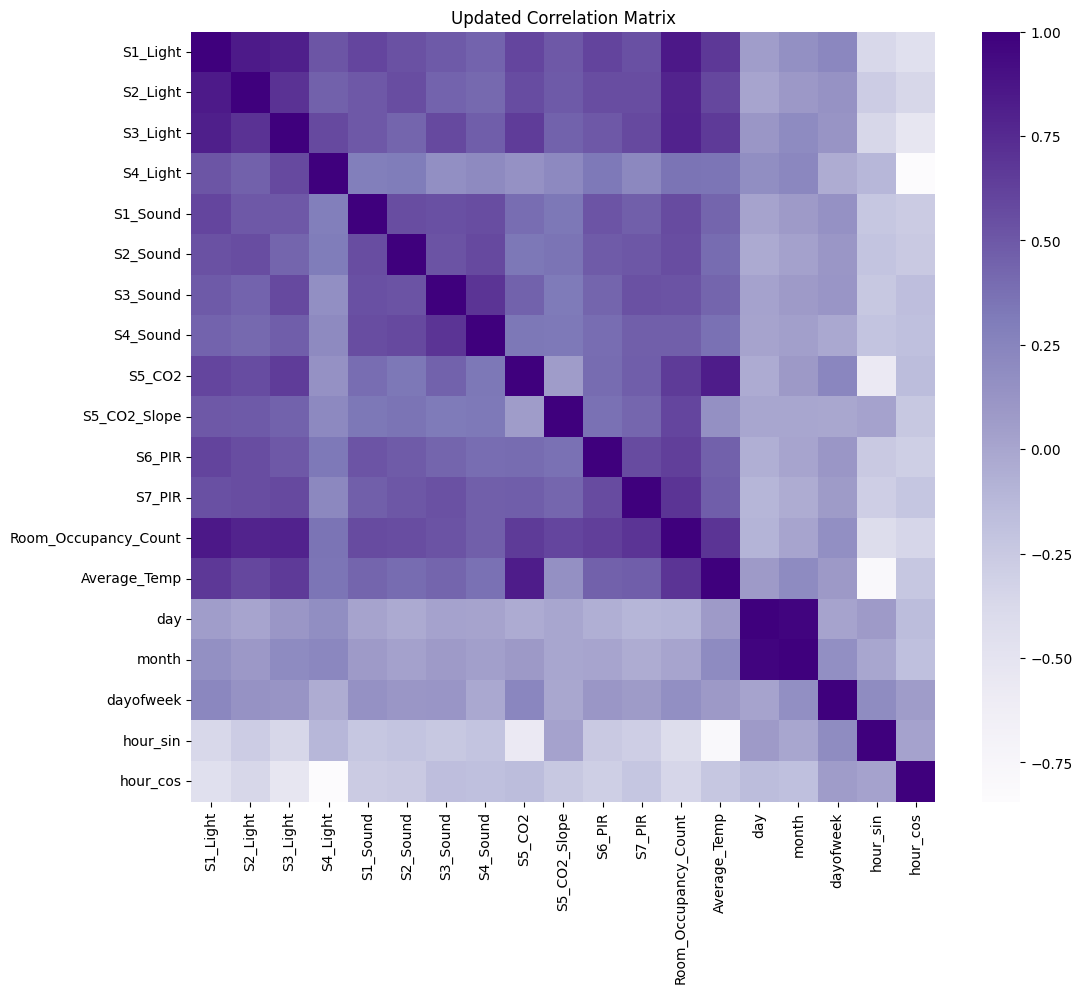

In [ ]:
# Computing the correlation matrix for the updated dataset
updated_correlation_matrix = df.corr()

# Plotting the heatmap for the updated correlation matrix in purple shades
plt.figure(figsize=(12, 10))
sns.heatmap(updated_correlation_matrix, annot=False, fmt=".2f", cmap="Purples")
plt.title("Updated Correlation Matrix")
plt.show()

From the above updated correlation matrix, we can see that the room accupancy count is indeed correlated with the day of week.

In [ ]:
# Standardization of Numerical Features
from sklearn.preprocessing import StandardScaler
# Excluding the target variable 'Room_Occupancy_Count' from standardization
features_to_scale = df.columns.difference(['Room_Occupancy_Count'])
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

Here, we have performed standardization (or Z-score normalization) which scales the data so that it has a mean of 0 and a standard deviation of 1. This is particularly important for models that are sensitive to the scale of the data, like SVMs, k-NN, and logistic regression.

In [ ]:
df.head()

,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,Average_Temp,day,month,dayofweek,hour_sin,hour_cos
DateTime,,,,,,,,,,,,,,,,,,,
2017-12-22 10:49:41,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469,-0.314749,-0.294029,1,-1.365806,0.166199,0.50296,0.394755,0.709121,-1.391221
2017-12-22 10:50:12,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817,-0.314749,-0.294029,1,-1.328229,0.166199,0.50296,0.394755,0.709121,-1.391221
2017-12-22 10:50:42,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864,-0.314749,-0.294029,1,-1.328229,0.166199,0.50296,0.394755,0.709121,-1.391221
2017-12-22 10:51:13,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609,-0.314749,-0.294029,1,-1.290652,0.166199,0.50296,0.394755,0.709121,-1.391221
2017-12-22 10:51:44,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053,-0.314749,-0.294029,1,-1.290652,0.166199,0.50296,0.394755,0.709121,-1.391221


In [ ]:
df = df.reset_index()
df = df.drop('DateTime', axis=1)

We removed the DateTime as we no longer need it, due to the existence of the extacted timely features.

## Data Modeling After Enhancements

Now, data is ready to be fit into ML models, so that these models can help us predict the room occupancy counts given the other features, which is our classification problem. I am requested to analyse the data using the following algorithms:

- **Random forest.**
- **SVM.**
- **Gradient boosting.**
- **XGBoost.**

For each model I am requested to find and report the best model parameters and apply k-folds cross-validation. I will evaluate the results using the accuracy, precicion, recall and f1-score classification metrics.

Before starting, I just want to justify the use of grid search and the k-folds cross validation:

- Each of the algorithms that we are going to use has key hyperparameters that significantly influence their performance. **Grid Search** systematically explores a range of hyperparameter values to find the most effective combination for our specific dataset.

- **K-Folds Cross-Validation** helps ensure that the model not only fits the training data well but also generalizes effectively to new data. It's particularly important for complex models like Random Forest and XGBoost. Also, by using multiple folds, each instance in the dataset gets to be in the test set exactly once. This provides a more reliable estimate of the model's performance on unseen data.

And before applying any of the models, I will use SMOTE with the training data. **SMOTE (or Synthetic Minority Over-sampling Technique)** is an oversampling technique used to address class imbalance in datasets. I used it specifically to handle the imbalance problem in the dataset because it works by creating synthetic examples from the minority class rather than replicating them, as in traditional oversampling methods, thereby preventing overfitting. SMOTE selects individual instances from the minority class and generates new synthetic instances by interpolating between neighboring instances. This way I'll avoid overfitting and handle the class imbalance problem effeciently.

Finally, I'll use accuracy, precision, recall, and f1-score to evaluate the performances of the different models, but because our data is multi-labeled the concepts of these metrics might differ a little bit, as below:

- **Accuracy:** This is the ratio of correctly predicted observations to the total observations. It's a measure of how many predictions made by the model are correct.

- **Precision:** For each class, precision tells us the proportion of predictions that were correctly identified. For example, when the model predicts class 1, how often is it actually class 1? It's calculated as the ratio of true positives (correctly predicted as class 1) to the sum of true and false positives (all instances predicted as class 1, correctly or not).

- **Recall:** For each class, recall indicates how well the model can identify this class. For example, for class 1, it's the ratio of true positives (correctly predicted as class 1) to the sum of true positives and false negatives (all actual instances of class 1). It answers the question, "Of all the actual class 1 instances, how many did we correctly identify?"

- **F1 Score:** The F1 score is the harmonic mean of precision and recall, providing a balance between them. It's particularly useful when the class distribution is imbalanced. The F1 score for each class tells us how well the model performs for that class in terms of a balance between precision and recall.

- **ROC-AUC Score:** The ROC-AUC score evaluates a classifier's ability to differentiate between classes. An AUC score of 1 indicates perfect classification, while 0.5 suggests no discriminative power, equivalent to random guessing. It's useful for comparing the predictive strength of models, especially in imbalanced datasets.Binarizing the target variable and predicted values allows us to compute this metric in multiclass classification. Binarizing will convert the problem into a set of binary classification tasks (e.g., one-vs-rest) which will make it more tractable.

Finally, I just want to note that in the precision, recall, f1-score and roc-auc score, I will depend on the macro average of them, meaning that we compute metrics for each class independently and then average them, treating each class equally.**'macro'** averaging is a useful method for evaluating model performance in a balanced way across all classes, particularly in multiclass classification problems, like our case.



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter

# Preparing the data
X = df.drop(['Room_Occupancy_Count'], axis=1)  # Features
y = df['Room_Occupancy_Count']                 # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Original class counts
class_counts_original = Counter(y_train)

# Applying SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Class counts after applying SMOTE
class_counts_resampled = Counter(y_train_resampled)

(class_counts_original, class_counts_resampled)

(Counter({0: 6582, 2: 599, 3: 555, 1: 367}),
 Counter({0: 6582, 2: 6582, 3: 6582, 1: 6582}))

Now the train and test data are ready to be modelled using the four models.

In [ ]:
import pandas as pd

# Creating a DataFrame with performance metrics for each model
p_a_d = {
    'Model': ['Random Forest', 'SVM', 'Gradient Boosting', 'XGBoost'],
    'Accuracy': [None, None, None, None],
    'Precision': [None, None, None, None],
    'Recall': [None, None, None, None],
    'F1-Score': [None, None, None, None],
    'ROC-AUC Score': [None, None, None, None]
}

p_a = pd.DataFrame(p_a_d)

A dataframe was created to store the performance metrics for the models after the enhancments.

### Random Forest

Random Forest is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. It introduces randomness by selecting a subset of features and data points for building each tree, which ensures diversity among the trees and results in a more robust overall model. This method is effective in handling both regression and classification tasks, and it's known for its ability to deal with overfitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Defining the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with Cross-Validation
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# Training the model with the best parameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluating the model on the test set
y_pred = best_rf_model.predict(X_test)

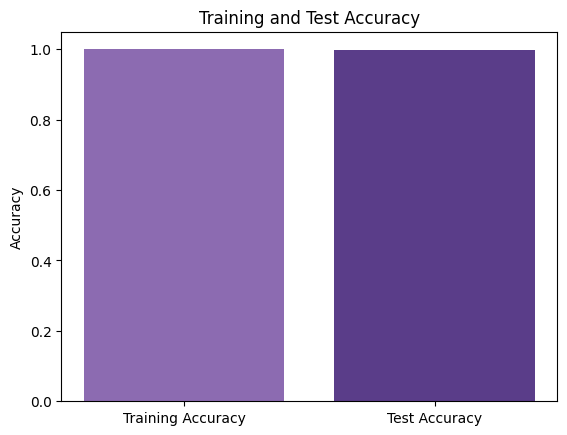

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = best_rf_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plotting with shades of purple
colors = ['#8c6bb1', '#5a3d89']

plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=colors)
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

The plot suggests that the model's accuracy on the training set is very similar to its accuracy on the test set. When both training and test accuracies are high and close to each other, it is an indication that there is **no overfitting**. Overfitting would typically be indicated by a high training accuracy but significantly lower test accuracy, which would suggest that the model has learned the training data too well, including its noise and outliers, and is not generalizing well to unseen data. In this case, the random forest model appears to be well-generalized, capable of performing equally well on both seen (training) and unseen (test) data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Calculating basic performance metrics
accuracy_rf = accuracy_score(y_test, y_pred)
precision_rf = precision_score(y_test, y_pred, average='macro')
recall_rf = recall_score(y_test, y_pred, average='macro')
f1_rf = f1_score(y_test, y_pred, average='macro')

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_resampled))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_train_resampled))

# Calculating the ROC-AUC score
roc_auc_rf = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')

# Printing the performance metrics
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"ROC-AUC Score: {roc_auc_rf}")

Accuracy: 0.9965449160908193
Precision: 0.9879065433721407
Recall: 0.9876514895466177
F1 Score: 0.9876571547629902
ROC-AUC Score: 0.9931011491091575


In [ ]:
p_a['Accuracy'][0] = accuracy_rf
p_a['Precision'][0] = precision_rf
p_a['Recall'][0] = recall_rf
p_a['F1-Score'][0] = f1_rf
p_a['ROC-AUC Score'][0] = roc_auc_rf

The Random Forest seem to have done a very good job on our data. with a 99.6% accuracy and 98.7% f1-score.

It's worth noting that we used 5 folds to train the model, because in practice, 5 or 10-fold cross-validation is often used, but it would be good to experiment with different values and monitor the change in the performance metrics. That's why we will try finding the best hyperparameters for the random forest below with 10 folds and see if the performance enhances.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Defining the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search with Cross-Validation
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
# Training the model with the best parameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_)
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Evaluating the model on the test set
y_pred = best_rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Calculating basic performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_resampled))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_train_resampled))

# Calculating the ROC-AUC score
roc_auc = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')

# Printing the performance metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

Accuracy: 0.9970384995064165
Precision: 0.9895290599284321
Recall: 0.9894500506976969
F1 Score: 0.9894056722985596
ROC-AUC Score: 0.9940670253160236


- The performance metrics for the Random Forest model have shown **a slight improvement** when increasing the number of folds in cross-validation from 5 to 10. Specifically, metrics such as accuracy, precision, recall, F1 score, and ROC-AUC score all experienced a marginal increase. This suggests that the model with 10-fold cross-validation was able to learn from the training process more effectively, potentially providing a more generalized model.

- However, this incremental improvement in performance comes at the cost of significantly increased training time. The **trade-off between training time and performance gain** is not linear; the slight uptick in metric scores may not justify the added computational expense for every project or application. Therefore, while the 5-fold cross-validation approach has shown to be less computationally intensive and still provides robust performance, it has been chosen as the preferred method for subsequent models in this analysis.

- For future considerations, one might opt for 10-fold cross-validation if the marginal gains in performance are critical and if there are **sufficient computational resources to accommodate the longer training times**. This approach would be particularly relevant in scenarios where even a small increase in performance metrics is valuable and where the computational cost is not a limiting factor.

### SVM

SVM (or Support Vector Machine) is a powerful, supervised machine learning algorithm used for both classification and regression. The core idea of SVM is to find the optimal hyperplane (in two-dimensional space, this would be a line) that best separates the data into its classes. SVM uses kernel functions to transform data into a higher-dimensional space where a hyperplane can be used to separate classes. The goal is to maximize the margin between data points of different classes, making SVM effective in handling complex datasets with clear margin of separation.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['rbf', 'linear'],  # Type of kernel
    'gamma': ['scale', 'auto']  # Kernel coefficient
}

# Defining the SVM model
svm = SVC()

# Grid Search for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Training the model with the best parameters
best_params = grid_search.best_params_
best_svm_model = SVC(**best_params)
best_svm_model.fit(X_train_resampled, y_train_resampled)

# Predicting and evaluating the model
y_pred = best_svm_model.predict(X_test)

print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


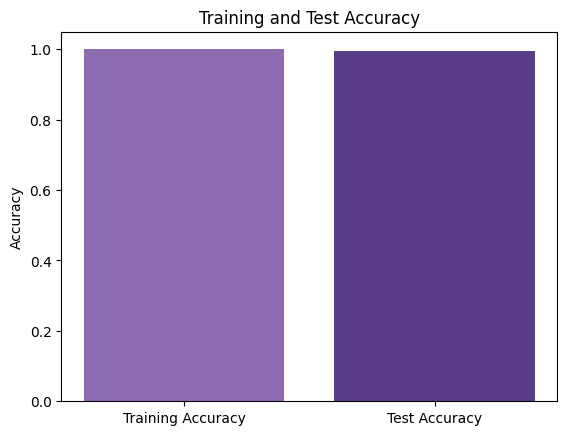

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = best_svm_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plotting with shades of purple
colors = ['#8c6bb1', '#5a3d89']

plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=colors)
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

The plot suggests that the model's accuracy on the training set is very similar to its accuracy on the test set. When both training and test accuracies are high and close to each other, it is an indication that there is **no overfitting**. Overfitting would typically be indicated by a high training accuracy but significantly lower test accuracy, which would suggest that the model has learned the training data too well, including its noise and outliers, and is not generalizing well to unseen data. In this case, the svm model appears to be well-generalized, capable of performing equally well on both seen (training) and unseen (test) data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Calculating basic performance metrics
accuracy_svm = accuracy_score(y_test, y_pred)
precision_svm = precision_score(y_test, y_pred, average='macro')
recall_svm = recall_score(y_test, y_pred, average='macro')
f1_svm = f1_score(y_test, y_pred, average='macro')

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_resampled))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_train_resampled))

# Calculating the ROC-AUC score
roc_auc_svm = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')

# Printing the performance metrics
print(f"Accuracy: {accuracy_svm}")
print(f"Precision: {precision_svm}")
print(f"Recall: {recall_svm}")
print(f"F1 Score: {f1_svm}")
print(f"ROC-AUC Score: {roc_auc_svm}")

Accuracy: 0.9950641658440277
Precision: 0.9845522090202942
Recall: 0.9854284528862838
F1 Score: 0.9848724405939386
ROC-AUC Score: 0.9917869771468568


In [ ]:
p_a['Accuracy'][1] = accuracy_svm
p_a['Precision'][1] = precision_svm
p_a['Recall'][1] = recall_svm
p_a['F1-Score'][1] = f1_svm
p_a['ROC-AUC Score'][1] = roc_auc_svm

SVM seems to also have done a very good job on the data with an accuracy of 99.50% and f1-score of 98.40% as well. However, Random forest is better performing in both the accuracy and f1-score.

### Gradient Boosting

Gradient Boosting is an ensemble technique that builds a model in a stage-wise fashion. It involves training decision trees sequentially, where each new tree attempts to correct the errors of the previous trees. The learning procedure consecutively fits new models to provide a more accurate estimate of the response variable. The method combines weak learners to create a strong learner, making it highly effective for complex regression and classification problems.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

gbc = GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

best_gbc_model = GradientBoostingClassifier(**grid_search.best_params_)
best_gbc_model.fit(X_train_resampled, y_train_resampled)

y_pred = best_gbc_model.predict(X_test)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


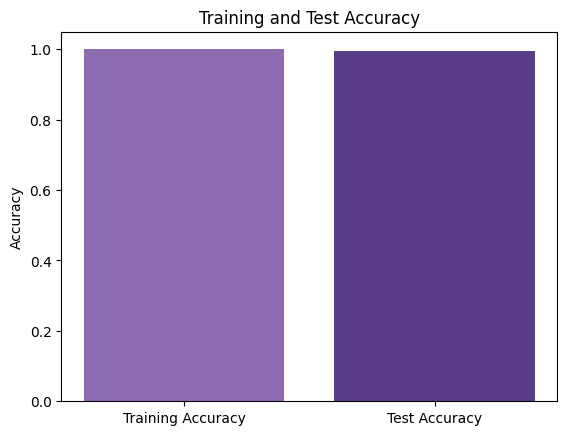

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = best_gbc_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plotting with shades of purple
colors = ['#8c6bb1', '#5a3d89']

plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=colors)
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

The plot suggests that the model's accuracy on the training set is very similar to its accuracy on the test set. When both training and test accuracies are high and close to each other, it is an indication that there is **no overfitting**. Overfitting would typically be indicated by a high training accuracy but significantly lower test accuracy, which would suggest that the model has learned the training data too well, including its noise and outliers, and is not generalizing well to unseen data. In this case, the gradient boosting model appears to be well-generalized, capable of performing equally well on both seen (training) and unseen (test) data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Calculating basic performance metrics
accuracy_g = accuracy_score(y_test, y_pred)
precision_g = precision_score(y_test, y_pred, average='macro')
recall_g = recall_score(y_test, y_pred, average='macro')
f1_g = f1_score(y_test, y_pred, average='macro')

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_resampled))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_train_resampled))

# Calculating the ROC-AUC score
roc_auc_g = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')

# Printing the performance metrics
print(f"Accuracy: {accuracy_g}")
print(f"Precision: {precision_g}")
print(f"Recall: {recall_g}")
print(f"F1 Score: {f1_g}")
print(f"ROC-AUC Score: {roc_auc_g}")

Accuracy: 0.9955577492596249
Precision: 0.9847251383598047
Recall: 0.9840543672444594
F1 Score: 0.9841558282098077
ROC-AUC Score: 0.9911693966954251


In [ ]:
p_a['Accuracy'][2] = accuracy_g
p_a['Precision'][2] = precision_g
p_a['Recall'][2] = recall_g
p_a['F1-Score'][2] = f1_g
p_a['ROC-AUC Score'][2] = roc_auc_g

The results of the Gradient Boosting are similar to the SVM's with 99.50% accuracy and 98.4% f1-score. However, Gradient boosting took a lot of training time (approximately 1 hour) while the SVM and Random Forest took less than 10 minutes on our data. So, if they were to produce close results and performance, SVM and Random forest are better computationally than gradient boosting for our case.

### XGBoost

 XGBoost (or eXtreme Gradient Boosting) is an efficient and scalable implementation of gradient boosting. It stands out for its computational speed and performance efficiency, handling large datasets well. XGBoost improves upon the base Gradient Boosting framework through systems optimization and algorithmic enhancements, like handling missing values internally and providing regularization to avoid overfitting. It has proven to be a highly effective and versatile algorithm in various machine learning competitions and tasks.

In [ ]:
from xgboost import XGBClassifier

# Defining the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Grid Search with Cross-Validation
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Training the model with the best parameters
best_xgb_model = XGBClassifier(**grid_search.best_params_)
best_xgb_model.fit(X_train_resampled, y_train_resampled)

# Evaluating the model on the test set
y_pred = best_xgb_model.predict(X_test)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


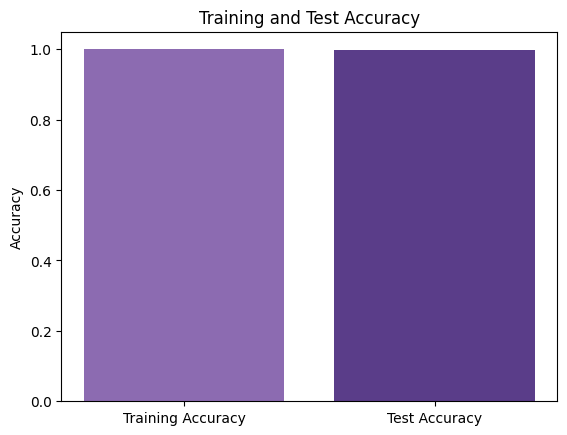

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Training accuracy
y_train_pred = best_xgb_model.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Plotting with shades of purple
colors = ['#8c6bb1', '#5a3d89']

plt.bar(['Training Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=colors)
plt.title('Training and Test Accuracy')
plt.ylabel('Accuracy')
plt.show()

The plot suggests that the model's accuracy on the training set is very similar to its accuracy on the test set. When both training and test accuracies are high and close to each other, it is an indication that there is **no overfitting**. Overfitting would typically be indicated by a high training accuracy but significantly lower test accuracy, which would suggest that the model has learned the training data too well, including its noise and outliers, and is not generalizing well to unseen data. In this case, the xgboost model appears to be well-generalized, capable of performing equally well on both seen (training) and unseen (test) data.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Calculating basic performance metrics
accuracy_x = accuracy_score(y_test, y_pred)
precision_x = precision_score(y_test, y_pred, average='macro')
recall_x = recall_score(y_test, y_pred, average='macro')
f1_x = f1_score(y_test, y_pred, average='macro')

# Preparing the target variable for AUC-ROC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_train_resampled))
y_pred_binarized = label_binarize(y_pred, classes=np.unique(y_train_resampled))

# Calculating the ROC-AUC score
roc_auc_x = roc_auc_score(y_test_binarized, y_pred_binarized, average='macro', multi_class='ovr')

# Printing the performance metrics
print(f"Accuracy: {accuracy_x}")
print(f"Precision: {precision_x}")
print(f"Recall: {recall_x}")
print(f"F1 Score: {f1_x}")
print(f"ROC-AUC Score: {roc_auc_x}")

Accuracy: 0.9970384995064165
Precision: 0.9905810894531705
Recall: 0.9893293418956111
F1 Score: 0.9898411515343839
ROC-AUC Score: 0.9940047081688661


In [ ]:
p_a['Accuracy'][3] = accuracy_x
p_a['Precision'][3] = precision_x
p_a['Recall'][3] = recall_x
p_a['F1-Score'][3] = f1_x
p_a['ROC-AUC Score'][3] = roc_auc_x

XGBoost performed very good on our dataset regarding the result and the computation time. The results slightly exceed the Random Forests' with 99.70% accuracy and 98.9% f1-score. XGBoost provided the ultimate best performance on our data across all measures.

## Plotting the Results

Below are the results of all the above enhanced models across some measures.

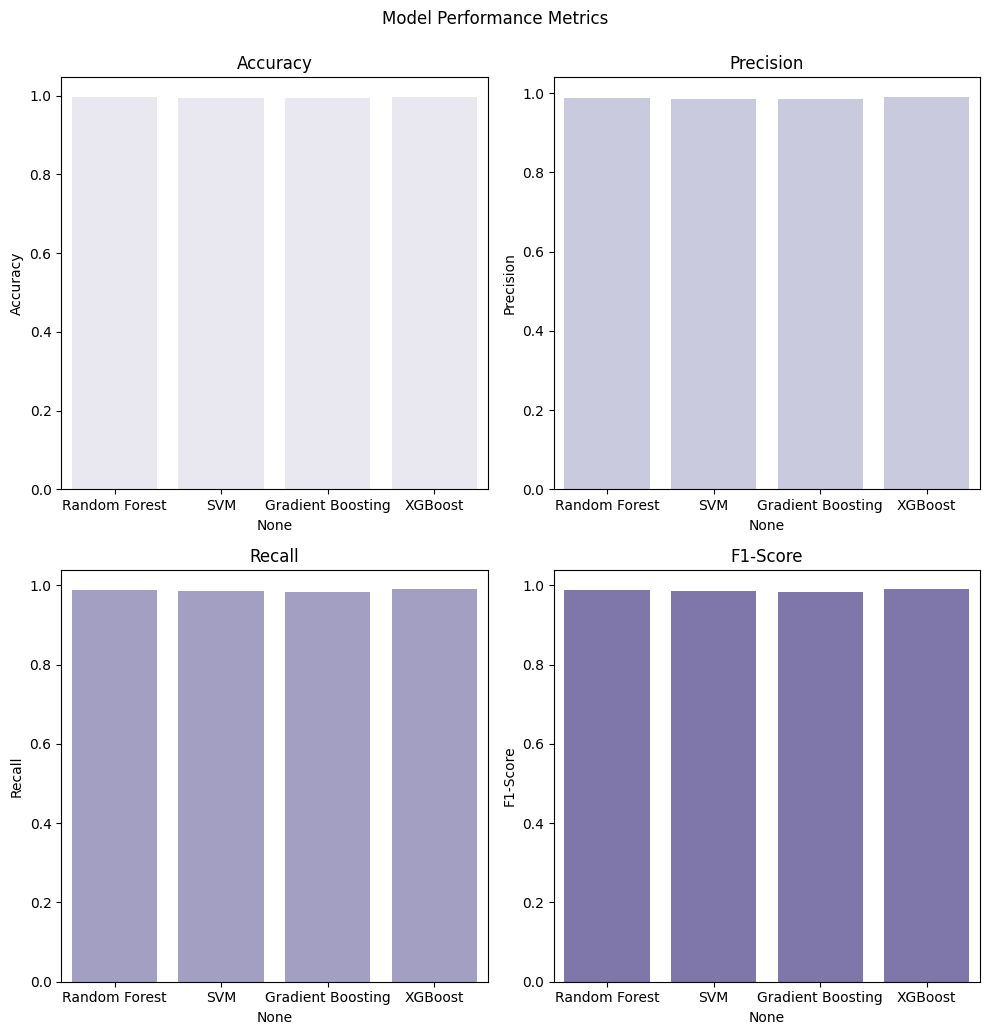

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

metrics = {
    'Random Forest': {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1-Score': f1_rf, 'ROC-AUC': roc_auc_rf},
    'SVM': {'Accuracy': accuracy_svm, 'Precision': precision_svm, 'Recall': recall_svm, 'F1-Score': f1_svm, 'ROC-AUC': roc_auc_svm},
    'Gradient Boosting': {'Accuracy': accuracy_g, 'Precision': precision_g, 'Recall': recall_g, 'F1-Score': f1_g, 'ROC-AUC': roc_auc_g},
    'XGBoost': {'Accuracy': accuracy_x, 'Precision': precision_x, 'Recall': recall_x, 'F1-Score': f1_x, 'ROC-AUC': roc_auc_x}
}

# Converting the metrics into a DataFrame for easy plotting
df = pd.DataFrame(metrics).T

# Creating a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Defining a different shade of purple for each subplot
colors = sns.color_palette("Purples", n_colors=5)

# Plotting each performance measure in a separate subplot with a different color
sns.barplot(data=df, x=df.index, y='Accuracy', ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('Accuracy')

sns.barplot(data=df, x=df.index, y='Precision', ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('Precision')

sns.barplot(data=df, x=df.index, y='Recall', ax=axes[1, 0], color=colors[2])
axes[1, 0].set_title('Recall')

sns.barplot(data=df, x=df.index, y='F1-Score', ax=axes[1, 1], color=colors[3])
axes[1, 1].set_title('F1-Score')

# Adjusting layout for better spacing
plt.tight_layout()

plt.suptitle('Model Performance Metrics', y=1.03)
plt.show()

As can be seen from the above, the performance metrics are so close for the 4 models. However, when focusing more, XGBoost is performing slightly better than the other models in all metrics.



Now let's see if the enhancements we made in the data (datetime column, multicollinearity, data scaling and class imbalance) and in the models (hyperparameter tuning and cross validation) made differences in the performance measures or not.

In [ ]:
# The performance measures before enhancements
p_b

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score
0,Random Forest,0.997038,0.991731,0.989209,0.990284,0.993942
1,SVM,0.977789,0.972932,0.920151,0.943929,0.9479
2,Gradient Boosting,0.997532,0.993043,0.991128,0.992045,0.994969
3,XGBoost,0.996545,0.98899,0.987531,0.988091,0.993039


In [ ]:
# The performance measures after enhancements
p_a

,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC Score
0,Random Forest,0.996545,0.987907,0.987651,0.987657,0.993101
1,SVM,0.995064,0.984552,0.985428,0.984872,0.991787
2,Gradient Boosting,0.995558,0.984725,0.984054,0.984156,0.991169
3,XGBoost,0.997038,0.990581,0.989329,0.989841,0.994005


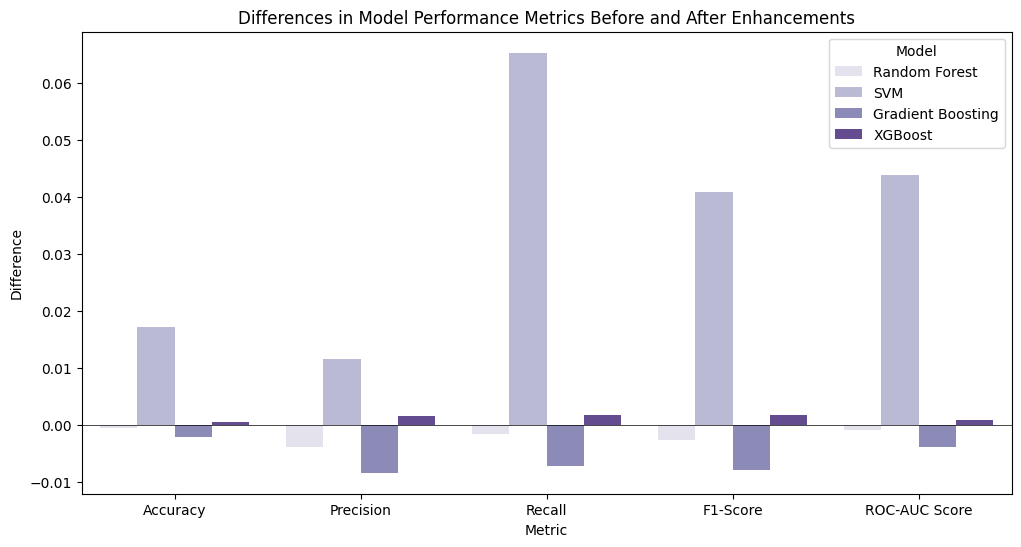

In [ ]:
# Computing the differences
p_diff = p_a.set_index('Model') - p_b.set_index('Model')
p_diff = p_diff.reset_index()

# Melting the dataframes for easier plotting
p_diff_melted = p_diff.melt(id_vars="Model", var_name="Metric", value_name="Difference")

# Setting a custom color palette with shades of purple using Matplotlib's 'Purples' colormap
custom_palette = sns.color_palette("Purples", n_colors=len(p_diff['Model'].unique()))

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Difference', hue='Model', data=p_diff_melted, palette=custom_palette)
plt.title('Differences in Model Performance Metrics Before and After Enhancements')
plt.axhline(0, color='black', linewidth=0.5)  # Adding a line at difference=0 for reference
plt.show()

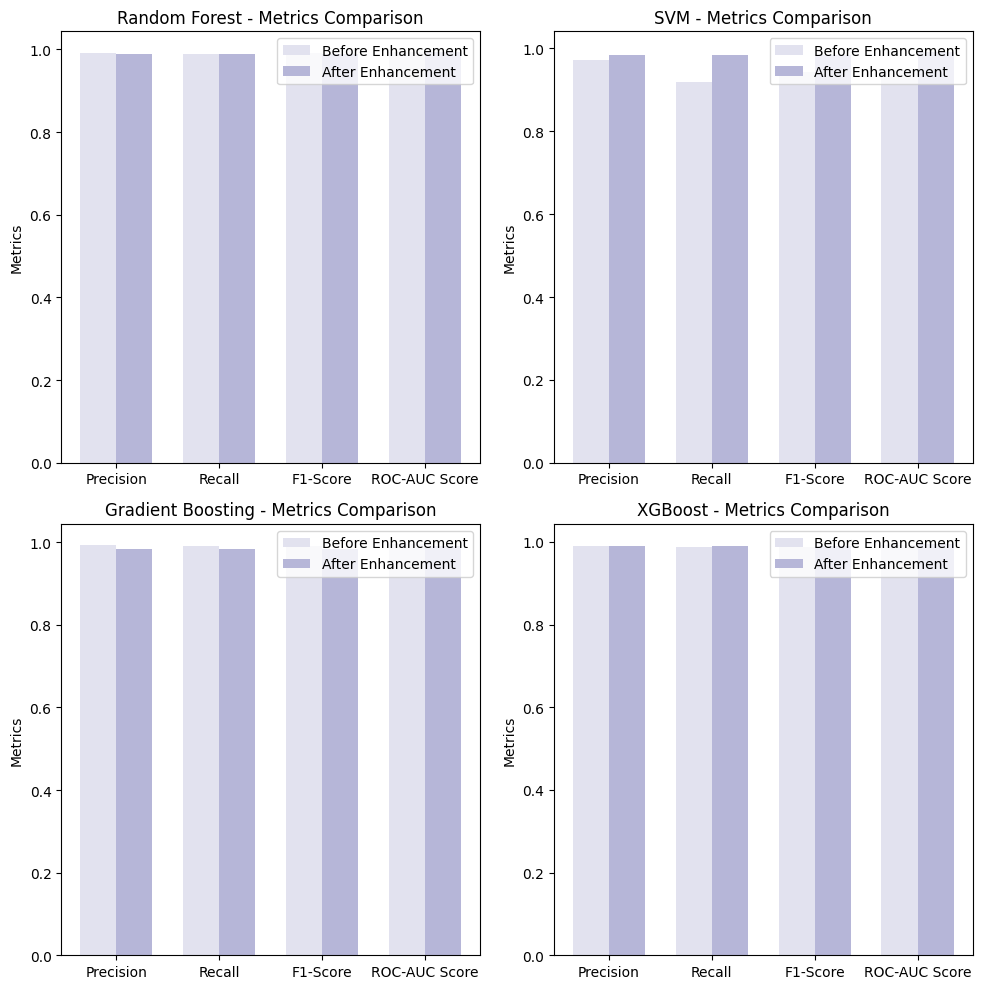

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get colors from the 'Purples' palette
custom_palette = sns.color_palette("Purples", n_colors=len(p_b['Model'].unique()))

# Plotting function
def plot_comparison_for_model(model_name, metrics_before, metrics_after, ax):
    bar_width = 0.35
    ind = np.arange(len(metrics_before))

    ax.bar(ind, metrics_before, bar_width, color=custom_palette[0], label='Before Enhancement')
    ax.bar(ind + bar_width, metrics_after, bar_width, color=custom_palette[1], label='After Enhancement')

    ax.set_ylabel('Metrics')
    ax.set_title(f'{model_name} - Metrics Comparison')
    ax.set_xticks(ind + bar_width / 2)
    ax.set_xticklabels(list(metrics_before.index))
    ax.legend()

# Plotting for each model in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

models = p_b['Model']
for i in range(2):
    for j in range(2):
        model_idx = i * 2 + j
        if model_idx < len(models):
            model = models[model_idx]
            metrics_before = p_b[p_b['Model'] == model].set_index('Model').iloc[:, 1:]
            metrics_after = p_a[p_a['Model'] == model].set_index('Model').iloc[:, 1:]
            plot_comparison_for_model(model, metrics_before.iloc[0], metrics_after.iloc[0], axs[i, j])

plt.tight_layout()
plt.show()


From the above two plots, the below can be inferred:

- The varying effects of the enhancements on the different models can be attributed to **the unique ways each algorithm interacts with the data**.

- **SVM** clearly benefited from the **data scaling** and class balancing.

- The ensemble methods (**Random Forest and Gradient Boosting**) showed a slight performance decline, indicating they may have been optimal with the original data structure or that the enhancements introduced some level of **complexity that did not translate into better generalization**.

- **XGBoost**'s slight improvements suggest it was able to **leverage the enhancements without being negatively affected by them**, potentially due to its sophisticated handling of regularization and tree pruning.

- Overall, while the enhancements are generally expected to improve a model's performance, the specific context and characteristics of the data play a crucial role. Enhancements that **make the data more challenging to model**, like correcting class imbalances, may lead to lower performance metrics but result in a **more robust and generalizable model**.

## Conclusions and Recommendations

Based on the above comprehensive analysis of the dataset for room occupancy estimation using various machine learning algorithms, below are the conclusions, recommendations and possible future improvments.


**Conclusions**

- While the enhancements led to a decrease in performance for some models, this does not necessarily indicate worse models. Instead, it suggests that the pre-enhancement models may have been overly optimistic in their evaluation due to class imbalance and possible overfitting. The post-enhancement models are likely more robust, less biased, and offer a better generalization to unseen data, which are crucial aspects of a reliable predictive model.

- After the enhancements, all models (Random Forest, SVM, Gradient Boosting, XGBoost) demonstrated high accuracy and F1-scores, indicating their effectiveness in predicting room occupancy from sensor data.

- After the enhancements, XGBoost showed the highest performance, closely followed by Random Forest, SVM and Gradient Boosting.

- The feature engineering performed on the DateTime column and the standardization of features appear to have been successful, as evidenced by the high performance of the models.

- The use of SMOTE for addressing class imbalance was effective, as indicated by the balanced performance metrics across different classes.

- While Gradient Boosting showed similar performance to the other models, all the other models were significantly more efficient in terms of training time, making them a more practical choice for similar datasets rather than using the gradient boosting.

- The results of the models are balanced, which is indicated by several key factors.
  - Firstly, the use of k-folds cross-validation ensures that our models are evaluated on various data subsets, promoting generalization to new, unseen data.
  
  - Secondly, the consistent high performance of the models on both training and test sets, with no significant drop in metrics like accuracy and F1 score on the test set, suggests that the models are not overfitting to the training data.
  
  - Lastly, the employment of algorithms like Random Forest and XGBoost, which inherently resist overfitting through their ensemble nature and regularization techniques, further supports this conclusion.

  These elements collectively indicate a robust model performance that is likely generalizable beyond the training dataset.

**Recommendations**

- XGBoost is recommended to be used for solving the classification problem of this data, due to its balance of high accuracy, precision, recall, f1-score and computational efficiency. It provides the robustness of ensemble learning while being relatively fast to train.

**Future Improvements**

- It's recommended to explore more hyperparameter settings for Random Forest, XGBoost, and SVM as these models showed promising results. Further tuning might lead to even better performance.

- It's also recommended to use 10 folds cross validation if the computational resources and the training time are not a consideration as this increase of folds will make the models train more on the data, possibly enhancing the models' ability in classification.

- One should consider testing ensemble methods that combine the predictions of multiple models to potentially improve accuracy.

- Conducting a feature importance analysis, particularly for the Random Forest model, to identify which sensors contribute most to occupancy prediction can inform sensor placement and data collection strategies in future implementations.

## References

**1. The Research Paper:** https://www.semanticscholar.org/paper/Machine-Learning-Based-Occupancy-Estimation-Using-Singh-Jain/e631ea26f0fd88541f42b4e049d63d6b52d6d3ac

**2. Outliers:** https://www.expressanalytics.com/blog/outliers-machine-learning/#:~:text=An%20outlier%20is%20a%20data,considered%20when%20collecting%20the%20data.

**3. DateTime Feature Engineering:** https://towardsdatascience.com/cyclical-features-encoding-its-about-time-ce23581845ca

**4. VIF:** https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/#:~:text=Variance%20Inflation%20Factor%20(VIF)%20can,are%20contributing%20to%20the%20multicollinearity.

**5. Z-Score Normalization:** https://developers.google.com/machine-learning/data-prep/transform/normalization#:~:text=Z%2Dscore%20is%20a%20variation,extreme%20that%20you%20need%20clipping.

**6. Random Forest:** https://builtin.com/data-science/random-forest-algorithm#:~:text=Random%20forest%20is%20a%20flexible,both%20classification%20and%20regression%20tasks).

**7. SVM:** https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm

**8. Gradient Boosting:** https://www.geeksforgeeks.org/ml-gradient-boosting/

**9. XGBoost:** https://www.geeksforgeeks.org/xgboost/

**10. Grid Search:** https://www.analyticsvidhya.com/blog/2021/06/tune-hyperparameters-with-gridsearchcv/

**11. K-Folds Cross-Validation:** https://www.analyticsvidhya.com/blog/2022/02/k-fold-cross-validation-technique-and-its-essentials/#:~:text=K%2Dfold%20cross%2Dvalidation%20is,estimate%20the%20model's%20generalization%20performance.

**12. SMOTE (Synthetic Minority Over-sampling Technique):** https://medium.com/@corymaklin/synthetic-minority-over-sampling-technique-smote-7d419696b88c#:~:text=SMOTE%20is%20a%20technique%20to,minority%20class)%20in%20feature%20space.

**13. Accuracy, Precision, Recall, F1-Score, ROC-AUC Score:** https://medium.com/@priyankads/beyond-accuracy-recall-precision-f1-score-roc-auc-6ef2ce097966

**14. Macro Average:** https://medium.com/@ehudkr/a-visual-way-to-think-on-macro-and-micro-averages-in-classification-metrics-190285dc927f